# Assignment 4- Data Processing

__Note:__ _This assignment may optionally by done as pairs for students in 4510; this is particularly recommended for students who don't have as strong a background in Python and/or databases.  Students enrolled in 8515 should work individually._

The goal of this assignment is to experiment with loading and pre-processing data from external sources (i.e. as opposed to using the "built-in" datasets that come with SKLearn as we have done in the past).

This notebook is fairly minimal, but it loads the data using Pandas (see https://pandas.pydata.org/pandas-docs/stable/ for documentation).  Be sure you've downloaded the data file from Blackboard and put it in the same folder as this scaffolding.  It's also worth checking out the example from class (available in annotated form in the Content area), which demonstrates a bunch of operations that you might find useful here.

A major point of this assignment is to learn about exploratory data analysis and data cleaning; a secondary part is to begin to familiarize yourself with the Pandas library, which is very useful for doing this type of data processing.  The provided dataset represents temperature data collected from three different weather stations in the Philadelphia area, with one sample per month at each station.  However, there are a number of missing values, and also a number of readings that are clearly incorrect (e.g. consider the min/max values for the temperature column and see if they're realistic).  The data also has a number of extra columns that will not be useful for the current problem, but might be useful under other circumstances.

The goal is to create a data set with a single (clean) row of values for each date.  If you have 'good' values from all three weather stations, you should use the average of those values; however, you need to be careful not to let the 'bad' data mess up your estimates.  E.g. if there's a missing value, you want to take the average of the two good values (as opposed to adding the two good values and then dividing by three); if there's a clearly mistaken measurement, you likewise don't want to include that in the average.

Note that you need to do this for each of the three temperature columns, TMIN, TMAX, and TAVG.  Once you have created this cleaned version of the data set, you should generate a few simple plots to look at the resulting data, including a line graph that shows how the temperatures (monthly low, high, and average) have evolved over the time period included in the data, and a box plot showing the distribution of the data from each of those three columns.

In [1]:
# CSC 4510 - Machine Learning
# Assignment 4
# Scaffolding by Dr. Ben Mitchell
# Assignment completed by: <YOUR NAME(S) HERE>
# Resources used: 
#   <List any resources you used beyond the ones posted on Blackboard>
#   <This can include books, websites, other students, etc.>

In [2]:
import pandas as pd # database loading and manipulation library
import numpy as np # numeric python lybrary
import matplotlib.pyplot as plt # plotting and graphing library
%matplotlib notebook 

### Note the way we load this file
If we just do read_csv() normally, the "date" column will just be a text string.  To take advantage of Pandas' Date object type, we can ask the file reader to parse that column as dates, which will result in date objects that are easier to work with.

In [3]:
data = pd.read_csv('temperaturesRaw.csv', parse_dates=['DATE'])

In [4]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-01-01,NaN,NaN,4.69,",,,X",25.9,",X",32.8,",,,X",19.1,",,,X"
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-02-01,NaN,NaN,2.84,",,,X",31.8,",X",40.2,",,,X",23.3,",,,X"
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-03-01,NaN,NaN,3.76,",,,X",43.8,",X",54.5,",,,X",33.2,",,,X"
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-04-01,NaN,NaN,3.93,",,,X",52.0,",X",62.2,",,,X",41.7,",,,X"
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-05-01,NaN,NaN,7.41,",,,0",61.9,",0",71.3,",,,0",52.5,",,,0"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 16 columns):
STATION            3399 non-null object
NAME               3399 non-null object
LATITUDE           3399 non-null float64
LONGITUDE          3399 non-null float64
ELEVATION          3399 non-null float64
DATE               3399 non-null datetime64[ns]
AWND               409 non-null float64
AWND_ATTRIBUTES    409 non-null object
PRCP               3331 non-null float64
PRCP_ATTRIBUTES    3331 non-null object
TAVG               3261 non-null float64
TAVG_ATTRIBUTES    3290 non-null object
TMAX               3285 non-null float64
TMAX_ATTRIBUTES    3315 non-null object
TMIN               3307 non-null float64
TMIN_ATTRIBUTES    3336 non-null object
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 425.0+ KB


In [6]:
data['PRCP'].max()

19.31

### TimeDate objects are flexible
You can treat them as units, but its also easy to pull out the components using properties (see https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components)

In [7]:
data['DATE'][0]

Timestamp('1948-01-01 00:00:00')

In [8]:
print('first row year is', data['DATE'][0].year, 'first row month is', data['DATE'][0].month)

first row year is 1948 first row month is 1


## From here it's up to you
Your job is to explore the data, figure out what's wrong with it, produce a cleaned version which also combines the values from the three weather stations, and then show some nice graphs and charts demonstating the properties that the cleaned-up version of the data has (e.g. a plot of how temperatures have changed over time, a box-plot showing means/medians/ranges, etc.).

This will be a process much like we went through in class, so the notebook from class is a good reference, though please note that your version should contain markdown (in class, I essentially gave the "markdown" as a verbal presentation rather than in writing).

Since a big part of the point of exploratory data analysis is to experiment and then explain those experiments and their results, you're going to need to annotate your code (using Markdown cells); I'm looking for not just code here, but also an explanation of the reasoning behind the code.  Again, the example using the Titanic data is a good reference for how this might work.

***

According to the NOAA documentation, AWND is the average wind speed, PRCP is the total precipitation, TAVG is the monthly average temperature, TMIN and TMAX are the monthly min and max temperatures.  The ATTRIBUTES columns give extra information about the associated column.  Full documentation can be found at https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf but for this assignment it's safe to just ignore the ATTRIBUTES columns.

It's fine to drop columns that you're not using for your analysis, particularly if they seem to be distracting and/or not really meaningful in the conjoined version of the data.

In [9]:
# Average wind speed seems to not matter considering only 11% of the rows have it
# Drop all attribute columns as they are gunking up the data
clean = data.drop(['AWND','AWND_ATTRIBUTES','PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'], axis = 1)

In [10]:
clean[0:20]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-01-01,4.69,25.9,32.8,19.1
1,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-02-01,2.84,31.8,40.2,23.3
2,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-03-01,3.76,43.8,54.5,33.2
3,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-04-01,3.93,52.0,62.2,41.7
4,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-05-01,7.41,61.9,71.3,52.5
5,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-06-01,4.94,71.1,81.2,61.0
6,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-07-01,1.90,76.4,85.9,66.8
7,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-08-01,5.96,74.6,83.9,65.3
8,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-09-01,2.09,67.7,78.4,57.0
9,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0,1948-10-01,1.53,55.2,64.0,46.5


In [11]:
# Name and Station don't seem to matter as we're trying to relate all this data together
# Lattitude and Longitude isn't significant either because we're in the philadelphia area
clean = clean.drop(['STATION','NAME','LATITUDE','LONGITUDE'],axis = 1)

In [12]:
clean[0:20]

,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,3.0,1948-01-01,4.69,25.9,32.8,19.1
1,3.0,1948-02-01,2.84,31.8,40.2,23.3
2,3.0,1948-03-01,3.76,43.8,54.5,33.2
3,3.0,1948-04-01,3.93,52.0,62.2,41.7
4,3.0,1948-05-01,7.41,61.9,71.3,52.5
5,3.0,1948-06-01,4.94,71.1,81.2,61.0
6,3.0,1948-07-01,1.90,76.4,85.9,66.8
7,3.0,1948-08-01,5.96,74.6,83.9,65.3
8,3.0,1948-09-01,2.09,67.7,78.4,57.0
9,3.0,1948-10-01,1.53,55.2,64.0,46.5


In [13]:
# how unique is elevation?
clean['ELEVATION'].unique()

array([  3. , 114.3,  32. ])

In [14]:
# check info
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 6 columns):
ELEVATION    3399 non-null float64
DATE         3399 non-null datetime64[ns]
PRCP         3331 non-null float64
TAVG         3261 non-null float64
TMAX         3285 non-null float64
TMIN         3307 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 159.4 KB


It is important to note that we are missing at most 138 values from each of our remaining columns. This isn't to bad overall, considering there is 3399 values total per column. It would be nice to populate these attributes to try and get a "complete" picture of the data.

It is also interesting to note that all of the temperature columns have different amounts of missing data. The minimum temperature has the most, then the max, then the avg.

The Precipitation attribute still matters a lot because rain can have massive effects on what the temperature is outside. Elevation matters due to temperatures being that temperatures can be heavily affected by what height people are at compared to others.

At this point it is unclear as to whether the date matters. We could possibly use all of the remaining values to fill in the missing data points for the different temperatures.

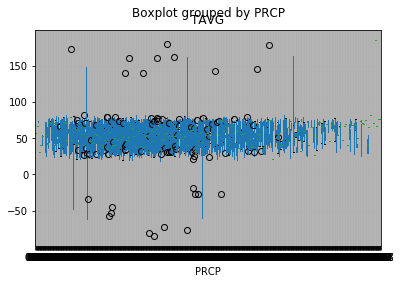

In [15]:
clean.boxplot(column = 'TAVG', by = 'PRCP')

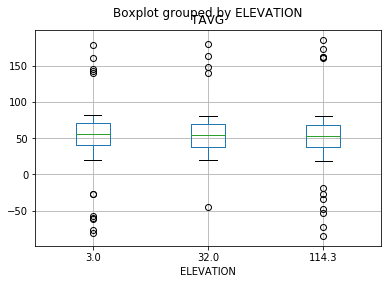

In [16]:
clean.boxplot(column = 'TAVG', by = 'ELEVATION')

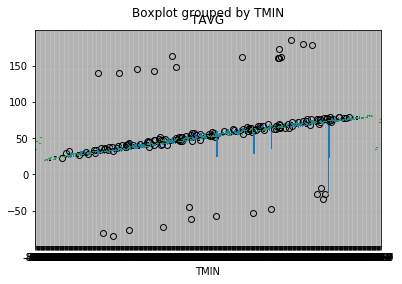

In [17]:
clean.boxplot(column = 'TAVG', by = 'TMIN')

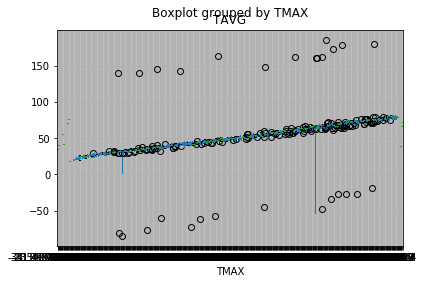

In [18]:
clean.boxplot(column = 'TAVG', by = 'TMAX')

From the above box and whisker plots, it appears that using precipitation and elevation to create the avg is a good idea.

It is interesting to note that average by min and average by max appear to look almost identical. However, it appears that there are far to many outliers to use these values to create avg temperature values.

In [19]:
clean['PRCP1'] = clean['PRCP']

meanPRCP = clean.PRCP.mean()
clean['PRCP1'].fillna(meanPRCP, inplace = True)
clean[0:20]

,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,PRCP1
0,3.0,1948-01-01,4.69,25.9,32.8,19.1,4.69
1,3.0,1948-02-01,2.84,31.8,40.2,23.3,2.84
2,3.0,1948-03-01,3.76,43.8,54.5,33.2,3.76
3,3.0,1948-04-01,3.93,52.0,62.2,41.7,3.93
4,3.0,1948-05-01,7.41,61.9,71.3,52.5,7.41
5,3.0,1948-06-01,4.94,71.1,81.2,61.0,4.94
6,3.0,1948-07-01,1.90,76.4,85.9,66.8,1.90
7,3.0,1948-08-01,5.96,74.6,83.9,65.3,5.96
8,3.0,1948-09-01,2.09,67.7,78.4,57.0,2.09
9,3.0,1948-10-01,1.53,55.2,64.0,46.5,1.53


In [20]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 7 columns):
ELEVATION    3399 non-null float64
DATE         3399 non-null datetime64[ns]
PRCP         3331 non-null float64
TAVG         3261 non-null float64
TMAX         3285 non-null float64
TMIN         3307 non-null float64
PRCP1        3399 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 186.0 KB


In [21]:
# Must figure out how to make multiple tables based on month
clean['DATE'].unique()

array(['1948-01-01T00:00:00.000000000', '1948-02-01T00:00:00.000000000',
       '1948-03-01T00:00:00.000000000', ...,
       '1925-08-01T00:00:00.000000000', '1927-11-01T00:00:00.000000000',
       '1934-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [22]:
tminAVG1 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[1]
tminAVG2 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[2]
tminAVG3 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[3]
tminAVG4 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[4]
tminAVG5 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[5]
tminAVG6 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[6]
tminAVG7 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[7]
tminAVG8 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[8]
tminAVG9 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[9]
tminAVG10 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[10]
tminAVG11 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[11]
tminAVG12 = clean.groupby(clean['DATE'].dt.month)['TMIN'].mean()[12]

In [23]:
tmaxAVG1 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[1]
tmaxAVG2 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[2]
tmaxAVG3 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[3]
tmaxAVG4 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[4]
tmaxAVG5 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[5]
tmaxAVG6 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[6]
tmaxAVG7 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[7]
tmaxAVG8 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[8]
tmaxAVG9 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[9]
tmaxAVG10 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[10]
tmaxAVG11 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[11]
tmaxAVG12 = clean.groupby(clean['DATE'].dt.month)['TMAX'].mean()[12]

In [24]:
tavgAVG1 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[1]
tavgAVG2 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[2]
tavgAVG3 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[3]
tavgAVG4 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[4]
tavgAVG5 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[5]
tavgAVG6 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[6]
tavgAVG7 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[7]
tavgAVG8 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[8]
tavgAVG9 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[9]
tavgAVG10 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[10]
tavgAVG11 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[11]
tavgAVG12 = clean.groupby(clean['DATE'].dt.month)['TAVG'].mean()[12]

In [25]:
prcpAVG1 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[1]
prcpAVG2 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[2]
prcpAVG3 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[3]
prcpAVG4 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[4]
prcpAVG5 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[5]
prcpAVG6 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[6]
prcpAVG7 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[7]
prcpAVG8 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[8]
prcpAVG9 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[9]
prcpAVG10 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[10]
prcpAVG11 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[11]
prcpAVG12 = clean.groupby(clean['DATE'].dt.month)['PRCP'].mean()[12]

In [26]:
clean['MONTH'] = clean['DATE'].dt.month
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 8 columns):
ELEVATION    3399 non-null float64
DATE         3399 non-null datetime64[ns]
PRCP         3331 non-null float64
TAVG         3261 non-null float64
TMAX         3285 non-null float64
TMIN         3307 non-null float64
PRCP1        3399 non-null float64
MONTH        3399 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 212.5 KB


In [27]:
# we have averages now for every column that had missing values by month
# now need a way to specifically impute these averages
clean['PRCP2'] = clean['PRCP']
clean['TAVG2'] = clean['TAVG']
clean['TMIN2'] = clean['TMIN']
clean['TMAX2'] = clean['TMAX']

In [28]:
# Put all of these averages into their proper places
clean.loc[clean['MONTH'] == 1 & clean['PRCP2'].isnull()] = prcpAVG1
clean.loc[clean['MONTH'] == 1 & clean['TAVG2'].isnull()] = tavgAVG1
clean.loc[clean['MONTH'] == 1 & clean['TMIN2'].isnull()] = tminAVG1
clean.loc[clean['MONTH'] == 1 & clean['TMAX2'].isnull()] = tmaxAVG1

Data has been imputed for January

In [29]:
clean.loc[clean['MONTH'] == 2 & clean['PRCP2'].isnull()] = prcpAVG2
clean.loc[clean['MONTH'] == 2 & clean['TAVG2'].isnull()] = tavgAVG2
clean.loc[clean['MONTH'] == 2 & clean['TMIN2'].isnull()] = tminAVG2
clean.loc[clean['MONTH'] == 2 & clean['TMAX2'].isnull()] = tmaxAVG2

Data has been imputed for February

In [30]:
clean.loc[clean['MONTH'] == 3 & clean['PRCP2'].isnull()] = prcpAVG3
clean.loc[clean['MONTH'] == 3 & clean['TAVG2'].isnull()] = tavgAVG3
clean.loc[clean['MONTH'] == 3 & clean['TMIN2'].isnull()] = tminAVG3
clean.loc[clean['MONTH'] == 3 & clean['TMAX2'].isnull()] = tmaxAVG3

Data has been imputed for March

In [31]:
clean.loc[clean['MONTH'] == 4 & clean['PRCP2'].isnull()] = prcpAVG4
clean.loc[clean['MONTH'] == 4 & clean['TAVG2'].isnull()] = tavgAVG4
clean.loc[clean['MONTH'] == 4 & clean['TMIN2'].isnull()] = tminAVG4
clean.loc[clean['MONTH'] == 4 & clean['TMAX2'].isnull()] = tmaxAVG4

Data has been imputed for April

In [32]:
clean.loc[clean['MONTH'] == 5 & clean['PRCP2'].isnull()] = prcpAVG5
clean.loc[clean['MONTH'] == 5 & clean['TAVG2'].isnull()] = tavgAVG5
clean.loc[clean['MONTH'] == 5 & clean['TMIN2'].isnull()] = tminAVG5
clean.loc[clean['MONTH'] == 5 & clean['TMAX2'].isnull()] = tmaxAVG5

Data has been imputed for May

In [33]:
clean.loc[clean['MONTH'] == 6 & clean['PRCP2'].isnull()] = prcpAVG6
clean.loc[clean['MONTH'] == 6 & clean['TAVG2'].isnull()] = tavgAVG6
clean.loc[clean['MONTH'] == 6 & clean['TMIN2'].isnull()] = tminAVG6
clean.loc[clean['MONTH'] == 6 & clean['TMAX2'].isnull()] = tmaxAVG6

Data has been imputed for June

In [34]:
clean.loc[clean['MONTH'] == 7 & clean['PRCP2'].isnull()] = prcpAVG7
clean.loc[clean['MONTH'] == 7 & clean['TAVG2'].isnull()] = tavgAVG7
clean.loc[clean['MONTH'] == 7 & clean['TMIN2'].isnull()] = tminAVG7
clean.loc[clean['MONTH'] == 7 & clean['TMAX2'].isnull()] = tmaxAVG7

Data has been imputed for July

In [35]:
clean.loc[clean['MONTH'] == 8 & clean['PRCP2'].isnull()] = prcpAVG8
clean.loc[clean['MONTH'] == 8 & clean['TAVG2'].isnull()] = tavgAVG8
clean.loc[clean['MONTH'] == 8 & clean['TMIN2'].isnull()] = tminAVG8
clean.loc[clean['MONTH'] == 8 & clean['TMAX2'].isnull()] = tmaxAVG8

Data has been imputed for August

In [36]:
clean.loc[clean['MONTH'] == 9 & clean['PRCP2'].isnull()] = prcpAVG9
clean.loc[clean['MONTH'] == 9 & clean['TAVG2'].isnull()] = tavgAVG9
clean.loc[clean['MONTH'] == 9 & clean['TMIN2'].isnull()] = tminAVG9
clean.loc[clean['MONTH'] == 9 & clean['TMAX2'].isnull()] = tmaxAVG9

Data has been imputed for September

In [37]:
clean.loc[clean['MONTH'] == 10 & clean['PRCP2'].isnull()] = prcpAVG10
clean.loc[clean['MONTH'] == 10 & clean['TAVG2'].isnull()] = tavgAVG10
clean.loc[clean['MONTH'] == 10 & clean['TMIN2'].isnull()] = tminAVG10
clean.loc[clean['MONTH'] == 10 & clean['TMAX2'].isnull()] = tmaxAVG10

Data has been imputed for October

In [38]:
clean.loc[clean['MONTH'] == 11 & clean['PRCP2'].isnull()] = prcpAVG11
clean.loc[clean['MONTH'] == 11 & clean['TAVG2'].isnull()] = tavgAVG11
clean.loc[clean['MONTH'] == 11 & clean['TMIN2'].isnull()] = tminAVG11
clean.loc[clean['MONTH'] == 11 & clean['TMAX2'].isnull()] = tmaxAVG11

Data has been imputed for November

In [39]:
clean.loc[clean['MONTH'] == 12 & clean['PRCP2'].isnull()] = prcpAVG12
clean.loc[clean['MONTH'] == 12 & clean['TAVG2'].isnull()] = tavgAVG12
clean.loc[clean['MONTH'] == 12 & clean['TMIN2'].isnull()] = tminAVG12
clean.loc[clean['MONTH'] == 12 & clean['TMAX2'].isnull()] = tmaxAVG12

Data has been imputed for December

# Now we can make complete fancy charts
With all the averages populated in we can use charts to show a more "accurate" representation of what the data looks like.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1264652b0>,
      dtype=object)

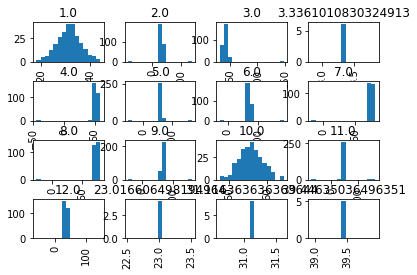

In [40]:
clean.hist(column='TAVG2',by='MONTH',bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a50b6d8>,
      dtype=object)

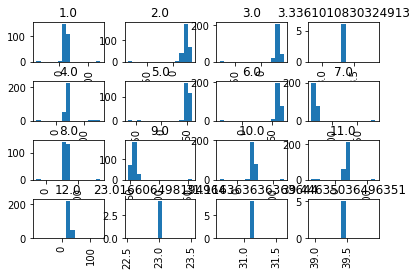

In [41]:
clean.hist(column='TMIN2',by='MONTH',bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aa9bbe0>,
      dtype=object)

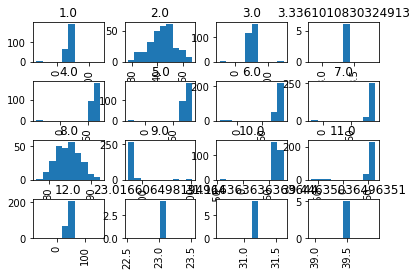

In [42]:
clean.hist(column='TMAX2',by='MONTH',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1371eda20>,
      dtype=object)

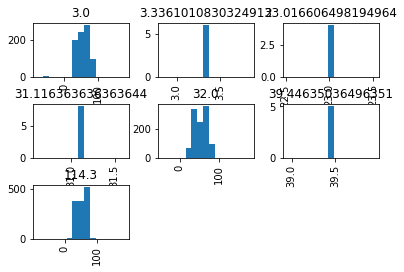

In [46]:
clean.hist(column='TAVG2',by='ELEVATION',bins=15)

We can see that elevation played a role in the temperature average from the above histograms.

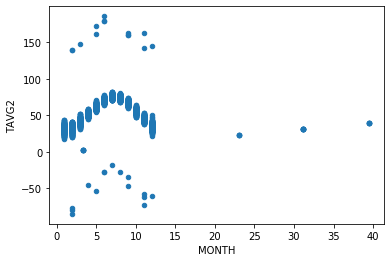

In [48]:
clean.plot.scatter(x = 'MONTH', y = 'TAVG2')

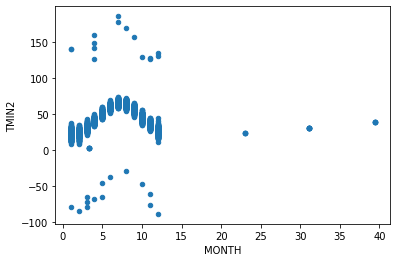

In [49]:
clean.plot.scatter(x = 'MONTH', y = 'TMIN2')

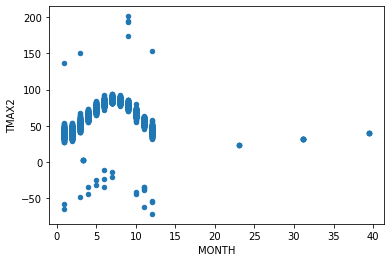

In [50]:
clean.plot.scatter(x = 'MONTH', y = 'TMAX2')

As can be seen by the above plots. The temperatures are fairly normal throughout all the moths. The three arcs that each section has is probably affected by the elevation and the 3 different station locations. It is also interesting to note that there are months in this dataset that don't belong, which was missed somehow during the cleaning. These three outliers do not necessarily impact the pattern that can be seen within the plots above.

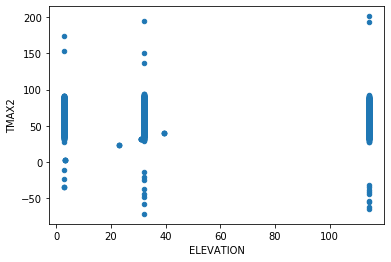

In [51]:
clean.plot.scatter(x = 'ELEVATION', y = 'TMAX2')

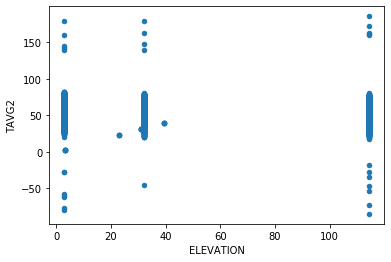

In [52]:
clean.plot.scatter(x = 'ELEVATION', y = 'TAVG2')

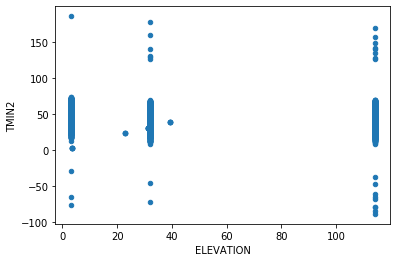

In [53]:
clean.plot.scatter(x = 'ELEVATION', y = 'TMIN2')

This shows that elevation had a neglible impact on the temperature. It should be noted that at the highest elevation, the temperature seems fairly regular. At the lower elevations, we may be prone to extreme outliers that are unexpected.

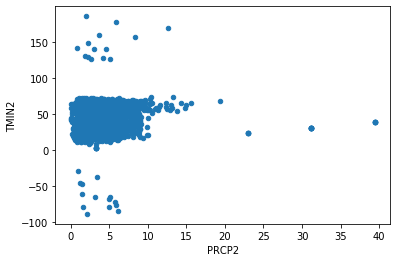

In [54]:
clean.plot.scatter(x = 'PRCP2', y = 'TMIN2')

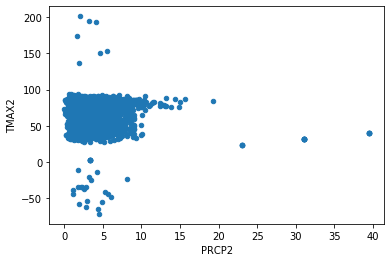

In [55]:
clean.plot.scatter(x = 'PRCP2', y = 'TMAX2')

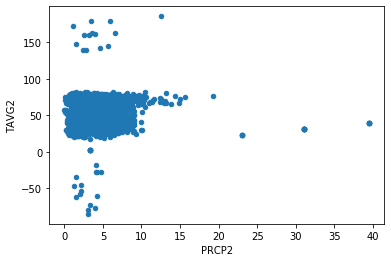

In [56]:
clean.plot.scatter(x = 'PRCP2', y = 'TAVG2')

By looking at the 3 plots above. We can see that precipitation affects the maximum temperatures that were recorded, but it doesn't seem to affect the min or avg as badly. However, it is nice to see the very regular blob in the center of all three. We must also remember that the temperature is in Celsius, and temperatures outside of the massive blobs are probably involving times when the temperature reading sensor had a serious malfunction on multiple occasions. It might be good to look into the temperature sensor maintenance schedule to deal with this many outliers. 

# Analysis

Although it appears on the charts that we have a drastic amount of outliers. The data seems fairly regular overall. This many outliers shows that either the sensors need to be recalibrated more often or the data needs to be stored more securely.

It is good to note that the biggest influencer with temperature change in the philadelphia area is time of year. It is interesting to point out that precipitation doesn't affect overall temperature readings throughout the month to drastically, and probably minimal by how the plots read. Elevation seems to have an affect, but it is only a significant difference at high elevations because temperature is more regular at the higher elevations according to the charts drafted.